Applied Data Science Capstone by IBM/Coursera
Table of contents

Introduction: Business Problem
Data
Methodology
Analysis
Results and Discussion
Conclusion
Introduction: Business Problem

This project aims to select the safest borough in London based on the total crimes, explore the neighborhoods of that borough to find the 10 most common venues in each neighborhood and finally cluster the neighborhoods using k-mean clustering.

This report will be targeted to people who are looking to relocate to London. Inorder to finalise a neighborhood to hunt for an apartment, safety is considered as a top concern when moving to a new place. If you don’t feel safe in your own home, you’re not going to be able to enjoy living there. The crime statistics will provide an insight into this issue.

We will focus on the safest borough and explore its neighborhoods and the 10 most common venues in each neighborhood so that the best neighborhood suited to an individual's needs can be selected.

Data 
Based on definition of our problem, factors that will influence our decision are:

The total number of crimes commited in each of the borough during the last year.
The most common venues in each of the neighborhood in the safest borough selected.
Following data sources will be needed to extract/generate the required information:

Part 1: Preprocessing a real world data set from Kaggle showing the London Crimes from 2008 to 2016: A dataset consisting of the crime statistics of each borough in London obtained from Kaggle
Part 2: Scraping additional information of the different Boroughs in London from a Wikipedia page.: More information regarding the boroughs of London is scraped using the Beautifulsoup library
Part 3: Creating a new dataset of the Neighborhoods of the safest borough in London and generating their co-ordinates.: Co-ordinate of neighborhood will be obtained using Google Maps API geocoding
Part 1: Preprocessing a real world data set from Kaggle showing the London Crimes from 2008 to 2016
London Crime Data
About this file

lsoa_code: code for Lower Super Output Area in Greater London.
borough: Common name for London borough.
major_category: High level categorization of crime
minor_category: Low level categorization of crime within major category.
value: monthly reported count of categorical crime in given borough
year: Year of reported counts, 2008-2016
month: Month of reported counts, 1-12
Data set URL: https://www.kaggle.com/jboysen/london-crime

In [131]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import os

In [132]:
import folium 

In [133]:
from geopy.geocoders import Nominatim 
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
%matplotlib inline
import seaborn as sns

In [134]:
print('Done!')

Done!


In [135]:
print('Folium installed')
print('Libraries imported.')

Folium installed
Libraries imported.


Define Foursquare Credentials and Version

Make sure that you have created a Foursquare developer account and have your credentials handy

In [144]:
CLIENT_ID = "XOFCOK0K1CJ4MWTRTZOBWYMFREMCWSANXJ0NT5MIS112AY5G"

CLIENT_SECRET = "AB3B0V2D4FLMID1GB5YYIS1BRM5GZ5BV0GIL3B25NEVBGGVM"
VERSION = '20180604'
VERSION = '20180604'
LIMIT = 30

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: XOFCOK0K1CJ4MWTRTZOBWYMFREMCWSANXJ0NT5MIS112AY5G
CLIENT_SECRET:AB3B0V2D4FLMID1GB5YYIS1BRM5GZ5BV0GIL3B25NEVBGGVM


In [150]:
# The code was removed by Watson Studio for sharing.

In [151]:
df.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


In [152]:
# Taking only the most recent year (2016) and dropping the rest
df.drop(df.index[df['year'] != 2016], inplace = True)

# Removing all the entires where crime values are null  
df = df[df.value != 0]

# Reset the index and dropping the previous index
df = df.reset_index(drop=True)

In [153]:
# Shape of the data frame
df.shape

(30501, 7)

In [154]:
# View the top of the dataset 
df.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01004177,Sutton,Theft and Handling,Theft/Taking of Pedal Cycle,1,2016,8
1,E01000733,Bromley,Criminal Damage,Criminal Damage To Motor Vehicle,1,2016,4
2,E01003989,Southwark,Theft and Handling,Theft From Shops,4,2016,8
3,E01002276,Havering,Burglary,Burglary in a Dwelling,1,2016,8
4,E01003674,Redbridge,Drugs,Possession Of Drugs,2,2016,11


In [155]:
df.columns = ['LSOA_Code', 'Borough','Major_Category','Minor_Category','No_of_Crimes','Year','Month']
df.head()

,LSOA_Code,Borough,Major_Category,Minor_Category,No_of_Crimes,Year,Month
0,E01004177,Sutton,Theft and Handling,Theft/Taking of Pedal Cycle,1,2016,8
1,E01000733,Bromley,Criminal Damage,Criminal Damage To Motor Vehicle,1,2016,4
2,E01003989,Southwark,Theft and Handling,Theft From Shops,4,2016,8
3,E01002276,Havering,Burglary,Burglary in a Dwelling,1,2016,8
4,E01003674,Redbridge,Drugs,Possession Of Drugs,2,2016,11


In [156]:
# View the information of the dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30501 entries, 0 to 30500
Data columns (total 7 columns):
LSOA_Code         30501 non-null object
Borough           30501 non-null object
Major_Category    30501 non-null object
Minor_Category    30501 non-null object
No_of_Crimes      30501 non-null int64
Year              30501 non-null int64
Month             30501 non-null int64
dtypes: int64(3), object(4)
memory usage: 1.6+ MB


In [158]:
df['Borough'].value_counts()

Lambeth                   1401
Southwark                 1279
Newham                    1250
Croydon                   1218
Tower Hamlets             1191
Ealing                    1189
Brent                     1150
Hackney                   1147
Barnet                    1113
Haringey                  1110
Lewisham                  1088
Enfield                   1068
Wandsworth                1041
Westminster               1019
Greenwich                 1015
Camden                    1012
Islington                  988
Hillingdon                 982
Hounslow                   959
Waltham Forest             957
Redbridge                  910
Bromley                    896
Hammersmith and Fulham     829
Kensington and Chelsea     778
Havering                   751
Barking and Dagenham       730
Bexley                     650
Merton                     647
Harrow                     640
Sutton                     538
Richmond upon Thames       528
Kingston upon Thames       419
City of 

In [159]:
df['Major_Category'].value_counts()

Theft and Handling             9959
Violence Against the Person    9704
Criminal Damage                3745
Burglary                       3351
Drugs                          1732
Robbery                        1111
Other Notifiable Offences       899
Name: Major_Category, dtype: int64

Pivoting the table to view the no. of crimes for each major category in each Borough¶

In [160]:
London_crime = pd.pivot_table(df,values=['No_of_Crimes'],
                               index=['Borough'],
                               columns=['Major_Category'],
                               aggfunc=np.sum,fill_value=0)
London_crime.head()

No_of_Crimes                        \
Major_Category           Burglary Criminal Damage Drugs   
Borough                                                   
Barking and Dagenham          112             147    65   
Barnet                        264             181    62   
Bexley                         77             140    62   
Brent                         213             180   145   
Bromley                       159             152    59   

                                                                           \
Major_Category       Other Notifiable Offences Robbery Theft and Handling   
Borough                                                                     
Barking and Dagenham                        30      35                380   
Barnet                                      43      29                720   
Bexley                                      18      10                357   
Brent                                       41      59                689   
Bromley                                     34      25                557   

                                                  
Major_Category       Violence Against the Person  
Borough                                           
Barking and Dagenham                         460  
Barnet                                       583  
Bexley                                       354  
Brent                                        687  
Bromley                                      486

In [162]:
# Reset the index
London_crime.reset_index(inplace = True)

In [163]:
# Total crimes per Borough
London_crime['Total'] = London_crime.sum(axis=1)
London_crime.head(33)

Borough No_of_Crimes                        \
Major_Category                             Burglary Criminal Damage Drugs   
0                 Barking and Dagenham          112             147    65   
1                               Barnet          264             181    62   
2                               Bexley           77             140    62   
3                                Brent          213             180   145   
4                              Bromley          159             152    59   
5                               Camden          210             177   178   
6                       City of London            0               0     1   
7                              Croydon          158             245    99   
8                               Ealing          175             215    96   
9                              Enfield          186             133    90   
10                           Greenwich          152             197    77   
11                             Hackney          197             140   128   
12              Hammersmith and Fulham           99             153    89   
13                            Haringey          173             154   131   
14                              Harrow          118             104    37   
15                            Havering          147             107    67   
16                          Hillingdon          176             179   101   
17                            Hounslow          161             160    91   
18                           Islington          191             145   160   
19              Kensington and Chelsea          106              93   150   
20                Kingston upon Thames           75              80    40   
21                             Lambeth          240             196   255   
22                            Lewisham          166             174    93   
23                              Merton          112             106    21   
24                              Newham          178             211   155   
25                           Redbridge          144             108    75   
26                Richmond upon Thames          104             102    16   
27                           Southwark          237             214   149   
28                              Sutton           87             104    31   
29                       Tower Hamlets          222             179   140   
30                      Waltham Forest          151             139    75   
31                          Wandsworth          214             153    60   
32                         Westminster          203             208   176   

                                                                     \
Major_Category Other Notifiable Offences Robbery Theft and Handling   
0                                     30      35                380   
1                                     43      29                720   
2                                     18      10                357   
3                                     41      59                689   
4                                     34      25                557   
5                                     34      77                930   
6                                      0       2                  5   
7                                     53      67                789   
8                                     41      64                767   
9                                     43      60                625   
10                                    28      45                600   
11                                    38      85                890   
12                                    28      26                807   
13                                    47      81                839   
14                                    22      24                369   
15                                    34      21                459   
16                                    35      46         

Removing the multi index so that it will be easier to merge

In [164]:
London_crime.columns = London_crime.columns.map(''.join)
London_crime.head()

,Borough,No_of_CrimesBurglary,No_of_CrimesCriminal Damage,No_of_CrimesDrugs,No_of_CrimesOther Notifiable Offences,No_of_CrimesRobbery,No_of_CrimesTheft and Handling,No_of_CrimesViolence Against the Person,Total
0,Barking and Dagenham,112,147,65,30,35,380,460,1229
1,Barnet,264,181,62,43,29,720,583,1882
2,Bexley,77,140,62,18,10,357,354,1018
3,Brent,213,180,145,41,59,689,687,2014
4,Bromley,159,152,59,34,25,557,486,1472


Renaming the columns

In [165]:
London_crime.columns = ['Borough','Burglary', 'Criminal Damage','Drugs','Other Notifiable Offences',
                        'Robbery','Theft and Handling','Violence Against the Person','Total']
London_crime.head()

,Borough,Burglary,Criminal Damage,Drugs,Other Notifiable Offences,Robbery,Theft and Handling,Violence Against the Person,Total
0,Barking and Dagenham,112,147,65,30,35,380,460,1229
1,Barnet,264,181,62,43,29,720,583,1882
2,Bexley,77,140,62,18,10,357,354,1018
3,Brent,213,180,145,41,59,689,687,2014
4,Bromley,159,152,59,34,25,557,486,1472


In [166]:

# Shape of the data set 
London_crime.shape

(33, 9)


Part 2: Scraping additional information of the different Boroughs in London from a Wikipedia page ¶
Using Beautiful soup to scrap the latitude and longitiude of the boroughs in London

URL: https://en.wikipedia.org/wiki/List_of_London_boroughs

In [167]:
# getting data from internet
wikipedia_link='https://en.wikipedia.org/wiki/List_of_London_boroughs'
raw_wikipedia_page= requests.get(wikipedia_link).text

# using beautiful soup to parse the HTML/XML codes.
soup = BeautifulSoup(raw_wikipedia_page,'xml')
print(soup.prettify())

<?xml version="1.0" encoding="utf-8"?>
<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="UTF-8"/>
  <title>
   List of London boroughs - Wikipedia
  </title>
  <script>
   document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"04308412-5acf-404e-aaba-1a8085c335e1","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"List_of_London_boroughs","wgTitle":"List of London boroughs","wgCurRevisionId":958873870,"wgRevisionId":958873870,"wgArticleId":28092685,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Use dmy dates from August 2015","Use British English from August 2015","Lists of 

In [169]:
# extracting the raw table inside that webpage
table = soup.find_all('table', {'class':'wikitable sortable'})
print(table)

[<table class="wikitable sortable" style="font-size:100%" width="100%">
<tbody><tr>
<th>Borough
</th>
<th>Inner
</th>
<th>Status
</th>
<th>Local authority
</th>
<th>Political control
</th>
<th>Headquarters
</th>
<th>Area (sq mi)
</th>
<th>Population (2013 est)<sup class="reference" id="cite_ref-1"><a href="#cite_note-1">[1]</a></sup>
</th>
<th>Co-ordinates
</th>
<th><span style="background:#67BCD3"> Nr. in map </span>
</th></tr>
<tr>
<td><a href="/wiki/London_Borough_of_Barking_and_Dagenham" title="London Borough of Barking and Dagenham">Barking and Dagenham</a> <sup class="reference" id="cite_ref-2"><a href="#cite_note-2">[note 1]</a></sup>
</td>
<td>
</td>
<td>
</td>
<td><a href="/wiki/Barking_and_Dagenham_London_Borough_Council" title="Barking and Dagenham London Borough Council">Barking and Dagenham London Borough Council</a>
</td>
<td><a href="/wiki/Labour_Party_(UK)" title="Labour Party (UK)">Labour</a>
</td>
<td><a href="/wiki/Barking_Town_Hall" title="Barking Town Hall">Town Ha

In [170]:
London_table = pd.read_html(str(table[0]), index_col=None, header=0)[0]
London_table.head()

,Borough,Inner,Status,Local authority,Political control,Headquarters,Area (sq mi),Population (2013 est)[1],Co-ordinates,Nr. in map
0,Barking and Dagenham [note 1],NaN,NaN,Barking and Dagenham London Borough Council,Labour,"Town Hall, 1 Town Square",13.93,194352,51°33′39″N 0°09′21″E﻿ / ﻿51.5607°N 0.1557°E,25
1,Barnet,NaN,NaN,Barnet London Borough Council,Conservative,"Barnet House, 2 Bristol Avenue, Colindale",33.49,369088,51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W,31
2,Bexley,NaN,NaN,Bexley London Borough Council,Conservative,"Civic Offices, 2 Watling Street",23.38,236687,51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E,23
3,Brent,NaN,NaN,Brent London Borough Council,Labour,"Brent Civic Centre, Engineers Way",16.70,317264,51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W,12
4,Bromley,NaN,NaN,Bromley London Borough Council,Conservative,"Civic Centre, Stockwell Close",57.97,317899,51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E,20


The second table on the site contains the addition Borough i.e. City of London

In [171]:
# Read in the second table 
London_table1 = pd.read_html(str(table[1]), index_col=None, header=0)[0]

# Rename the columns to match the previous table to append the tables.

London_table1.columns = ['Borough','Inner','Status','Local authority','Political control',
                         'Headquarters','Area (sq mi)','Population (2013 est)[1]','Co-ordinates','Nr. in map']

# View the table
London_table1

,Borough,Inner,Status,Local authority,Political control,Headquarters,Area (sq mi),Population (2013 est)[1],Co-ordinates,Nr. in map
0,City of London,([note 5],Sui generis;City;Ceremonial county,Corporation of London;Inner Temple;Middle Temple,?,Guildhall,1.12,7000,51°30′56″N 0°05′32″W﻿ / ﻿51.5155°N 0.0922°W,1


Append the data frame together

In [172]:
# A continuous index value will be maintained 
# across the rows in the new appended data frame. 

London_table = London_table.append(London_table1, ignore_index = True) 
London_table.head()

,Borough,Inner,Status,Local authority,Political control,Headquarters,Area (sq mi),Population (2013 est)[1],Co-ordinates,Nr. in map
0,Barking and Dagenham [note 1],NaN,NaN,Barking and Dagenham London Borough Council,Labour,"Town Hall, 1 Town Square",13.93,194352,51°33′39″N 0°09′21″E﻿ / ﻿51.5607°N 0.1557°E,25
1,Barnet,NaN,NaN,Barnet London Borough Council,Conservative,"Barnet House, 2 Bristol Avenue, Colindale",33.49,369088,51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W,31
2,Bexley,NaN,NaN,Bexley London Borough Council,Conservative,"Civic Offices, 2 Watling Street",23.38,236687,51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E,23
3,Brent,NaN,NaN,Brent London Borough Council,Labour,"Brent Civic Centre, Engineers Way",16.70,317264,51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W,12
4,Bromley,NaN,NaN,Bromley London Borough Council,Conservative,"Civic Centre, Stockwell Close",57.97,317899,51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E,20


Check if the last row was appended correctly

In [173]:
London_table.tail()

,Borough,Inner,Status,Local authority,Political control,Headquarters,Area (sq mi),Population (2013 est)[1],Co-ordinates,Nr. in map
28,Tower Hamlets,NaN,NaN,Tower Hamlets London Borough Council,Labour,"Town Hall, Mulberry Place, 5 Clove Crescent",7.63,272890,51°30′36″N 0°00′21″W﻿ / ﻿51.5099°N 0.0059°W,8
29,Waltham Forest,NaN,NaN,Waltham Forest London Borough Council,Labour,"Waltham Forest Town Hall, Forest Road",14.99,265797,51°35′27″N 0°00′48″W﻿ / ﻿51.5908°N 0.0134°W,28
30,Wandsworth,NaN,NaN,Wandsworth London Borough Council,Conservative,"The Town Hall, Wandsworth High Street",13.23,310516,51°27′24″N 0°11′28″W﻿ / ﻿51.4567°N 0.1910°W,5
31,Westminster,NaN,City,Westminster City Council,Conservative,"Westminster City Hall, 64 Victoria Street",8.29,226841,51°29′50″N 0°08′14″W﻿ / ﻿51.4973°N 0.1372°W,2
32,City of London,([note 5],Sui generis;City;Ceremonial county,Corporation of London;Inner Temple;Middle Temple,?,Guildhall,1.12,7000,51°30′56″N 0°05′32″W﻿ / ﻿51.5155°N 0.0922°W,1


View the information of the data set

In [174]:
London_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 10 columns):
Borough                     33 non-null object
Inner                       4 non-null object
Status                      5 non-null object
Local authority             33 non-null object
Political control           33 non-null object
Headquarters                33 non-null object
Area (sq mi)                33 non-null float64
Population (2013 est)[1]    33 non-null int64
Co-ordinates                33 non-null object
Nr. in map                  33 non-null int64
dtypes: float64(1), int64(2), object(7)
memory usage: 2.7+ KB


Removing Unnecessary string in the Data set

In [176]:
London_table = London_table.replace('note 1','', regex=True) 
London_table = London_table.replace('note 2','', regex=True) 
London_table = London_table.replace('note 3','', regex=True) 
London_table = London_table.replace('note 4','', regex=True) 
London_table = London_table.replace('note 5','', regex=True) 

# View the top of the data set
London_table.head()

,Borough,Inner,Status,Local authority,Political control,Headquarters,Area (sq mi),Population (2013 est)[1],Co-ordinates,Nr. in map
0,Barking and Dagenham [],NaN,NaN,Barking and Dagenham London Borough Council,Labour,"Town Hall, 1 Town Square",13.93,194352,51°33′39″N 0°09′21″E﻿ / ﻿51.5607°N 0.1557°E,25
1,Barnet,NaN,NaN,Barnet London Borough Council,Conservative,"Barnet House, 2 Bristol Avenue, Colindale",33.49,369088,51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W,31
2,Bexley,NaN,NaN,Bexley London Borough Council,Conservative,"Civic Offices, 2 Watling Street",23.38,236687,51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E,23
3,Brent,NaN,NaN,Brent London Borough Council,Labour,"Brent Civic Centre, Engineers Way",16.70,317264,51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W,12
4,Bromley,NaN,NaN,Bromley London Borough Council,Conservative,"Civic Centre, Stockwell Close",57.97,317899,51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E,20


In [177]:
type(London_table)

pandas.core.frame.DataFrame

In [178]:
# Shape of the data frame
London_table.shape

(33, 10)

In [180]:
set(df.Borough) - set(London_table.Borough)

{'Barking and Dagenham', 'Greenwich', 'Hammersmith and Fulham'}

These 3 Boroughs don't match because of the unnecessary symobols present "[]"

Find the index of the Boroughs that didn't match

In [181]:
print("The index of first borough is",London_table.index[London_table['Borough'] == 'Barking and Dagenham []'].tolist())
print("The index of second borough is",London_table.index[London_table['Borough'] == 'Greenwich []'].tolist())
print("The index of third borough is",London_table.index[London_table['Borough'] == 'Hammersmith and Fulham []'].tolist())

The index of first borough is [0]
The index of second borough is [9]
The index of third borough is [11]


Changing the Borough names to match the other data frame

In [182]:
London_table.iloc[0,0] = 'Barking and Dagenham'
London_table.iloc[9,0] = 'Greenwich'
London_table.iloc[11,0] = 'Hammersmith and Fulham'

Check if the Borough names in both data sets match

The Borough names in both data frames match

We can combine both the data frames together

In [183]:
Ld_crime = pd.merge(London_crime, London_table, on='Borough')
Ld_crime.head(10)

,Borough,Burglary,Criminal Damage,Drugs,Other Notifiable Offences,Robbery,Theft and Handling,Violence Against the Person,Total,Inner,Status,Local authority,Political control,Headquarters,Area (sq mi),Population (2013 est)[1],Co-ordinates,Nr. in map
0,Barking and Dagenham,112,147,65,30,35,380,460,1229,NaN,NaN,Barking and Dagenham London Borough Council,Labour,"Town Hall, 1 Town Square",13.93,194352,51°33′39″N 0°09′21″E﻿ / ﻿51.5607°N 0.1557°E,25
1,Barnet,264,181,62,43,29,720,583,1882,NaN,NaN,Barnet London Borough Council,Conservative,"Barnet House, 2 Bristol Avenue, Colindale",33.49,369088,51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W,31
2,Bexley,77,140,62,18,10,357,354,1018,NaN,NaN,Bexley London Borough Council,Conservative,"Civic Offices, 2 Watling Street",23.38,236687,51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E,23
3,Brent,213,180,145,41,59,689,687,2014,NaN,NaN,Brent London Borough Council,Labour,"Brent Civic Centre, Engineers Way",16.70,317264,51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W,12
4,Bromley,159,152,59,34,25,557,486,1472,NaN,NaN,Bromley London Borough Council,Conservative,"Civic Centre, Stockwell Close",57.97,317899,51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E,20
5,Camden,210,177,178,34,77,930,634,2240,NaN,NaN,Camden London Borough Council,Labour,"Camden Town Hall, Judd Street",8.40,229719,51°31′44″N 0°07′32″W﻿ / ﻿51.5290°N 0.1255°W,11
6,City of London,0,0,1,0,2,5,1,9,([],Sui generis;City;Ceremonial county,Corporation of London;Inner Temple;Middle Temple,?,Guildhall,1.12,7000,51°30′56″N 0°05′32″W﻿ / ﻿51.5155°N 0.0922°W,1
7,Croydon,158,245,99,53,67,789,794,2205,NaN,NaN,Croydon London Borough Council,Labour,"Bernard Weatherill House, Mint Walk",33.41,372752,51°22′17″N 0°05′52″W﻿ / ﻿51.3714°N 0.0977°W,19
8,Ealing,175,215,96,41,64,767,762,2120,NaN,NaN,Ealing London Borough Council,Labour,"Perceval House, 14-16 Uxbridge Road",21.44,342494,51°30′47″N 0°18′32″W﻿ / ﻿51.5130°N 0.3089°W,13
9,Enfield,186,133,90,43,60,625,598,1735,NaN,NaN,Enfield London Borough Council,Labour,"Civic Centre, Silver Street",31.74,320524,51°39′14″N 0°04′48″W﻿ / ﻿51.6538°N 0.0799°W,30


In [184]:
Ld_crime.shape

(33, 18)

In [185]:
set(df.Borough) - set(Ld_crime.Borough)

set()

Rearranging the Columns

In [186]:
list(Ld_crime)

['Borough',
 'Burglary',
 'Criminal Damage',
 'Drugs',
 'Other Notifiable Offences',
 'Robbery',
 'Theft and Handling',
 'Violence Against the Person',
 'Total',
 'Inner',
 'Status',
 'Local authority',
 'Political control',
 'Headquarters',
 'Area (sq mi)',
 'Population (2013 est)[1]',
 'Co-ordinates',
 'Nr. in map']

In [187]:
columnsTitles = ['Borough','Local authority','Political control','Headquarters',
                 'Area (sq mi)','Population (2013 est)[1]',
                 'Inner','Status',
                 'Burglary','Criminal Damage','Drugs','Other Notifiable Offences',
                 'Robbery','Theft and Handling','Violence Against the Person','Total','Co-ordinates']

Ld_crime = Ld_crime.reindex(columns=columnsTitles)

Ld_crime = Ld_crime[['Borough','Local authority','Political control','Headquarters',
                 'Area (sq mi)','Population (2013 est)[1]','Co-ordinates',
                 'Burglary','Criminal Damage','Drugs','Other Notifiable Offences',
                 'Robbery','Theft and Handling','Violence Against the Person','Total']]

Ld_crime.head()

,Borough,Local authority,Political control,Headquarters,Area (sq mi),Population (2013 est)[1],Co-ordinates,Burglary,Criminal Damage,Drugs,Other Notifiable Offences,Robbery,Theft and Handling,Violence Against the Person,Total
0,Barking and Dagenham,Barking and Dagenham London Borough Council,Labour,"Town Hall, 1 Town Square",13.93,194352,51°33′39″N 0°09′21″E﻿ / ﻿51.5607°N 0.1557°E,112,147,65,30,35,380,460,1229
1,Barnet,Barnet London Borough Council,Conservative,"Barnet House, 2 Bristol Avenue, Colindale",33.49,369088,51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W,264,181,62,43,29,720,583,1882
2,Bexley,Bexley London Borough Council,Conservative,"Civic Offices, 2 Watling Street",23.38,236687,51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E,77,140,62,18,10,357,354,1018
3,Brent,Brent London Borough Council,Labour,"Brent Civic Centre, Engineers Way",16.70,317264,51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W,213,180,145,41,59,689,687,2014
4,Bromley,Bromley London Borough Council,Conservative,"Civic Centre, Stockwell Close",57.97,317899,51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E,159,152,59,34,25,557,486,1472


# Methodology 
The methodology in this project consists of two parts:

# Exploratory Data Analysis: 

Visualise the crime rates in the London boroughs to idenity the safest borough and extract the neighborhoods in that borough to find the 10 most common venues in each neighborhood.
# Modelling:
To help people find similar neighborhoods in the safest borough we will be clustering similar neighborhoods using K - means clustering which is a form of unsupervised machine learning algorithm that clusters data based on predefined cluster size. We will use a cluster size of 5 for this project that will cluster the 15 neighborhoods into 5 clusters. The reason to conduct a K- means clustering is to cluster neighborhoods with similar venues together so that people can shortlist the area of their interests based on the venues/amenities around each neighborhood.

#  Exploratory Data Analysis 
Descriptive statistics of the data

In [188]:
London_crime.describe()

,Burglary,Criminal Damage,Drugs,Other Notifiable Offences,Robbery,Theft and Handling,Violence Against the Person,Total
count,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000
mean,157.787879,150.787879,96.181818,35.424242,50.242424,693.303030,551.878788,1735.606061
std,56.646247,49.085230,55.441103,15.960949,31.826709,356.684514,203.826942,700.219427
min,0.000000,0.000000,1.000000,0.000000,2.000000,5.000000,1.000000,9.000000
25%,112.000000,108.000000,62.000000,23.000000,24.000000,459.000000,460.000000,1321.000000
50%,161.000000,153.000000,90.000000,34.000000,48.000000,659.000000,583.000000,1770.000000
75%,197.000000,180.000000,140.000000,47.000000,68.000000,839.000000,714.000000,2200.000000
max,264.000000,245.000000,255.000000,75.000000,123.000000,2054.000000,893.000000,3732.000000


In [189]:
# use the inline backend to generate the plots within the browser
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

Matplotlib version:  3.0.2


Check if the column names are strings

In [192]:
Ld_crime.columns = list(map(str, Ld_crime.columns))



Sort the total crimes in descenting order to see 5 boroughs with the highest number of crimes

In [194]:
Ld_crime.sort_values(['Total'], ascending = False, axis = 0, inplace = True )

df_top5 = Ld_crime.head() 
df_top5

,Borough,Local authority,Political control,Headquarters,Area (sq mi),Population (2013 est)[1],Co-ordinates,Burglary,Criminal Damage,Drugs,Other Notifiable Offences,Robbery,Theft and Handling,Violence Against the Person,Total
32,Westminster,Westminster City Council,Conservative,"Westminster City Hall, 64 Victoria Street",8.29,226841,51°29′50″N 0°08′14″W﻿ / ﻿51.4973°N 0.1372°W,203,208,176,75,123,2054,893,3732
21,Lambeth,Lambeth London Borough Council,Labour,"Lambeth Town Hall, Brixton Hill",10.36,314242,51°27′39″N 0°06′59″W﻿ / ﻿51.4607°N 0.1163°W,240,196,255,51,98,1037,856,2733
24,Newham,Newham London Borough Council,Labour,"Newham Dockside, 1000 Dockside Road",13.98,318227,51°30′28″N 0°02′49″E﻿ / ﻿51.5077°N 0.0469°E,178,211,155,57,98,1184,714,2597
27,Southwark,Southwark London Borough Council,Labour,160 Tooley Street,11.14,298464,51°30′13″N 0°04′49″W﻿ / ﻿51.5035°N 0.0804°W,237,214,149,52,57,1028,732,2469
29,Tower Hamlets,Tower Hamlets London Borough Council,Labour,"Town Hall, Mulberry Place, 5 Clove Crescent",7.63,272890,51°30′36″N 0°00′21″W﻿ / ﻿51.5099°N 0.0059°W,222,179,140,52,104,927,680,2304


Visualize the five boroughs with the highest number of crimes

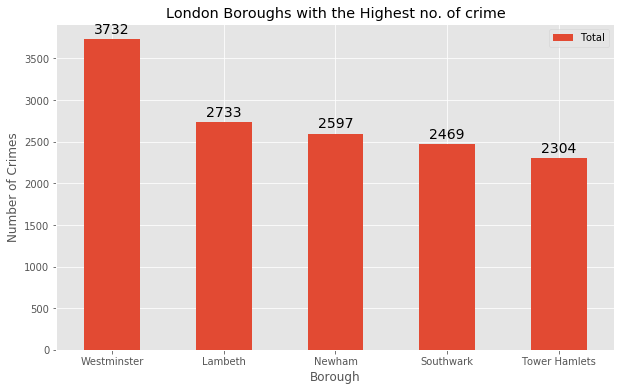

In [195]:
df_tt = df_top5[['Borough','Total']]

df_tt.set_index('Borough',inplace = True)

ax = df_tt.plot(kind='bar', figsize=(10, 6), rot=0)

ax.set_ylabel('Number of Crimes') # add to x-label to the plot
ax.set_xlabel('Borough') # add y-label to the plot
ax.set_title('London Boroughs with the Highest no. of crime') # add title to the plot

# Creating a function to display the percentage.

for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2), 
                (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize = 14
               )

plt.show()

# We'll stay clear from these places :)

Sort the total crimes in ascending order to see 5 boroughs with the highest number of crimes

In [196]:
Ld_crime.sort_values(['Total'], ascending = True, axis = 0, inplace = True )

df_bot5 = Ld_crime.head() 
df_bot5

,Borough,Local authority,Political control,Headquarters,Area (sq mi),Population (2013 est)[1],Co-ordinates,Burglary,Criminal Damage,Drugs,Other Notifiable Offences,Robbery,Theft and Handling,Violence Against the Person,Total
6,City of London,Corporation of London;Inner Temple;Middle Temple,?,Guildhall,1.12,7000,51°30′56″N 0°05′32″W﻿ / ﻿51.5155°N 0.0922°W,0,0,1,0,2,5,1,9
20,Kingston upon Thames,Kingston upon Thames London Borough Council,Liberal Democrat,"Guildhall, High Street",14.38,166793,51°24′31″N 0°18′23″W﻿ / ﻿51.4085°N 0.3064°W,75,80,40,14,4,260,231,704
26,Richmond upon Thames,Richmond upon Thames London Borough Council,Liberal Democrat,"Civic Centre, 44 York Street",22.17,191365,51°26′52″N 0°19′34″W﻿ / ﻿51.4479°N 0.3260°W,104,102,16,12,4,327,233,798
28,Sutton,Sutton London Borough Council,Liberal Democrat,"Civic Offices, St Nicholas Way",16.93,195914,51°21′42″N 0°11′40″W﻿ / ﻿51.3618°N 0.1945°W,87,104,31,13,15,277,315,842
14,Harrow,Harrow London Borough Council,Labour,"Civic Centre, Station Road",19.49,243372,51°35′23″N 0°20′05″W﻿ / ﻿51.5898°N 0.3346°W,118,104,37,22,24,369,306,980


Visualize the five boroughs with the least number of crimes

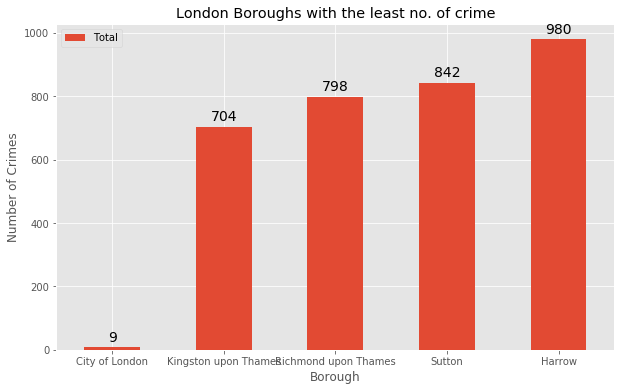

In [197]:
df_bt = df_bot5[['Borough','Total']]

df_bt.set_index('Borough',inplace = True)

ax = df_bt.plot(kind='bar', figsize=(10, 6), rot=0)

ax.set_ylabel('Number of Crimes') # add to x-label to the plot
ax.set_xlabel('Borough') # add y-label to the plot
ax.set_title('London Boroughs with the least no. of crime') # add title to the plot

# Creating a function to display the percentage.

for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2), 
                (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize = 14
               )

plt.show()

The borough City of London has the lowest no. of crimes recorded for the year 2016, Looking into the details of the borou

In [198]:
df_col = df_bot5[df_bot5['Borough'] == 'City of London']
df_col = df_col[['Borough','Total','Area (sq mi)','Population (2013 est)[1]']]
df_col

,Borough,Total,Area (sq mi),Population (2013 est)[1]
6,City of London,9,1.12,7000


As per the wikipedia page, The City of London is the 33rd principal division of Greater London but it is not a London borough.

URL: https://en.wikipedia.org/wiki/List_of_London_boroughs

Hence we will focus on the next borough with the least crime i.e. Kingston upon Thames
Visualizing different types of crimes in the borough 'Kingston upon Thames'

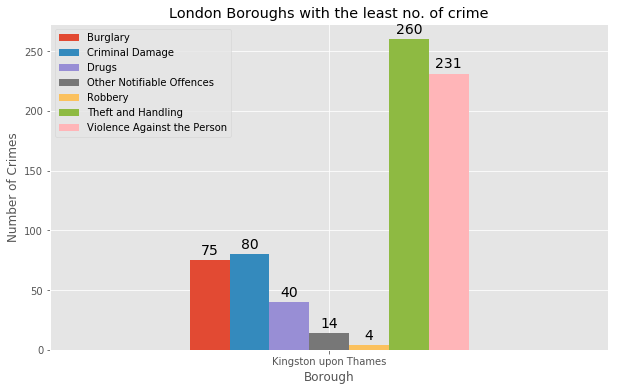

In [199]:
df_bc1 =  df_bot5[df_bot5['Borough'] == 'Kingston upon Thames']

df_bc = df_bc1[['Borough','Burglary','Criminal Damage','Drugs','Other Notifiable Offences',
                 'Robbery','Theft and Handling','Violence Against the Person']]


df_bc.set_index('Borough',inplace = True)

ax = df_bc.plot(kind='bar', figsize=(10, 6), rot=0)

ax.set_ylabel('Number of Crimes') # add to x-label to the plot
ax.set_xlabel('Borough') # add y-label to the plot
ax.set_title('London Boroughs with the least no. of crime') # add title to the plot

# Creating a function to display the percentage.

for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2), 
                (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize = 14
               )

plt.show()

We can conclude that Kingston upon Thames is the safest borough when compared to the other boroughs in London.

# Part 3: Creating a new dataset of the Neighborhoods of the safest borough in London and generating their co-ordinates. 
The list of Neighborhoods in the Royal Borough of Kingston upon Thames was found on a wikipedia page: https://en.wikipedia.org/wiki/List_of_districts_in_the_Royal_Borough_of_Kingston_upon_Thames

In [200]:
Neighborhood = ['Berrylands','Canbury','Chessington','Coombe','Hook','Kingston upon Thames',
'Kingston Vale','Malden Rushett','Motspur Park','New Malden','Norbiton',
'Old Malden','Seething Wells','Surbiton','Tolworth']

Borough = ['Kingston upon Thames','Kingston upon Thames','Kingston upon Thames','Kingston upon Thames',
          'Kingston upon Thames','Kingston upon Thames','Kingston upon Thames','Kingston upon Thames',
          'Kingston upon Thames','Kingston upon Thames','Kingston upon Thames','Kingston upon Thames',
          'Kingston upon Thames','Kingston upon Thames','Kingston upon Thames']

Latitude = ['','','','','','','','','','','','','','','']
Longitude = ['','','','','','','','','','','','','','','']

df_neigh = {'Neighborhood': Neighborhood,'Borough':Borough,'Latitude': Latitude,'Longitude':Longitude}
kut_neig = pd.DataFrame(data=df_neigh, columns=['Neighborhood', 'Borough', 'Latitude', 'Longitude'], index=None)

kut_neig

,Neighborhood,Borough,Latitude,Longitude
0,Berrylands,Kingston upon Thames,,
1,Canbury,Kingston upon Thames,,
2,Chessington,Kingston upon Thames,,
3,Coombe,Kingston upon Thames,,
4,Hook,Kingston upon Thames,,
5,Kingston upon Thames,Kingston upon Thames,,
6,Kingston Vale,Kingston upon Thames,,
7,Malden Rushett,Kingston upon Thames,,
8,Motspur Park,Kingston upon Thames,,
9,New Malden,Kingston upon Thames,,


Find the Co-ordiantes of each Neighborhood in the Kingston upon Thames Neighborhood

In [201]:
Latitude = []
Longitude = []

for i in range(len(Neighborhood)):
    address = '{},London,United Kingdom'.format(Neighborhood[i])
    geolocator = Nominatim(user_agent="London_agent")
    location = geolocator.geocode(address)
    Latitude.append(location.latitude)
    Longitude.append(location.longitude)
print(Latitude, Longitude)

[51.3937811, 51.41749865, 51.358336, 51.4194499, 51.3678984, 51.4096275, 51.43185, 51.3410523, 51.3909852, 51.4053347, 51.4099994, 51.382484, 51.3926421, 51.3937557, 51.3788758] [-0.2848024, -0.30555280504926163, -0.2986216, -0.2653985, -0.3071453, -0.3062621, -0.2581379, -0.3190757, -0.2488979, -0.2634066, -0.2873963, -0.2590897, -0.3143662, -0.3033105, -0.2828604]


In [202]:
df_neigh = {'Neighborhood': Neighborhood,'Borough':Borough,'Latitude': Latitude,'Longitude':Longitude}
kut_neig = pd.DataFrame(data=df_neigh, columns=['Neighborhood', 'Borough', 'Latitude', 'Longitude'], index=None)

kut_neig

,Neighborhood,Borough,Latitude,Longitude
0,Berrylands,Kingston upon Thames,51.393781,-0.284802
1,Canbury,Kingston upon Thames,51.417499,-0.305553
2,Chessington,Kingston upon Thames,51.358336,-0.298622
3,Coombe,Kingston upon Thames,51.419450,-0.265398
4,Hook,Kingston upon Thames,51.367898,-0.307145
5,Kingston upon Thames,Kingston upon Thames,51.409627,-0.306262
6,Kingston Vale,Kingston upon Thames,51.431850,-0.258138
7,Malden Rushett,Kingston upon Thames,51.341052,-0.319076
8,Motspur Park,Kingston upon Thames,51.390985,-0.248898
9,New Malden,Kingston upon Thames,51.405335,-0.263407


Get the co-ordinates of Berrylands, London, United Kingdom (The center neighborhood of Kingston upon Thame

In [204]:
address = 'Berrylands, London, United Kingdom'

geolocator = Nominatim(user_agent="ld_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Berrylands, London are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Berrylands, London are 51.3937811, -0.2848024.


Visualize the Neighborhood of Kingston upon Thames Borough

In [206]:
# create map of New York using latitude and longitude values
map_lon = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, borough, neighborhood in zip(kut_neig['Latitude'], kut_neig['Longitude'], kut_neig['Borough'], kut_neig['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_lon)  
    
map_lon

## Modelling 

Finding all the venues within a 500 meter radius of each neighborhood.

Perform one hot ecoding on the venues data.

Grouping the venues by the neighborhood and calculating their mean.

Performing a K-means clustering (Defining K = 5)

### Create a function to extract the venues from each Neighborhood

In [207]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [208]:
kut_venues = getNearbyVenues(names=kut_neig['Neighborhood'],
                                   latitudes=kut_neig['Latitude'],
                                   longitudes=kut_neig['Longitude']
                                  )

Berrylands
Canbury
Chessington
Coombe
Hook
Kingston upon Thames
Kingston Vale
Malden Rushett
Motspur Park
New Malden
Norbiton
Old Malden
Seething Wells
Surbiton
Tolworth


In [209]:
print(kut_venues.shape)
kut_venues.head()

(169, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Berrylands,51.393781,-0.284802,Surbiton Racket & Fitness Club,51.392676,-0.290224,Gym / Fitness Center
1,Berrylands,51.393781,-0.284802,Alexandra Park,51.394230,-0.281206,Park
2,Berrylands,51.393781,-0.284802,K2 Bus Stop,51.392302,-0.281534,Bus Stop
3,Canbury,51.417499,-0.305553,Canbury Gardens,51.417409,-0.305300,Park
4,Canbury,51.417499,-0.305553,The Boater's Inn,51.418546,-0.305915,Pub


In [210]:
kut_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Berrylands,3,3,3,3,3,3
Canbury,14,14,14,14,14,14
Chessington,1,1,1,1,1,1
Hook,5,5,5,5,5,5
Kingston Vale,4,4,4,4,4,4
Kingston upon Thames,30,30,30,30,30,30
Malden Rushett,4,4,4,4,4,4
Motspur Park,4,4,4,4,4,4
New Malden,9,9,9,9,9,9


In [211]:
print('There are {} uniques categories.'.format(len(kut_venues['Venue Category'].unique())))

There are 70 uniques categories.


One hot encoding

URL: https://hackernoon.com/what-is-one-hot-encoding-why-and-when-do-you-have-to-use-it-e3c6186d008f

In [213]:
kut_onehot = pd.get_dummies(kut_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
kut_onehot['Neighborhood'] = kut_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [kut_onehot.columns[-1]] + list(kut_onehot.columns[:-1])
kut_onehot = kut_onehot[fixed_columns]

kut_onehot.head()

,Neighborhood,Asian Restaurant,Athletics & Sports,Auto Garage,Bagel Shop,Bakery,Bar,Beer Bar,Bistro,Bowling Alley,...,Shop & Service,Soccer Field,Spa,Supermarket,Sushi Restaurant,Tea Room,Thai Restaurant,Theater,Train Station,Wine Shop
0,Berrylands,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Berrylands,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Berrylands,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Canbury,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Canbury,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Grouping rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [215]:
kut_grouped = kut_onehot.groupby('Neighborhood').mean().reset_index()
kut_grouped

,Neighborhood,Asian Restaurant,Athletics & Sports,Auto Garage,Bagel Shop,Bakery,Bar,Beer Bar,Bistro,Bowling Alley,...,Shop & Service,Soccer Field,Spa,Supermarket,Sushi Restaurant,Tea Room,Thai Restaurant,Theater,Train Station,Wine Shop
0,Berrylands,0.000000,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.0000,...,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
1,Canbury,0.000000,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.0000,...,0.071429,0.0000,0.071429,0.071429,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
2,Chessington,0.000000,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.0000,...,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
3,Hook,0.000000,0.00,0.00,0.00,0.200000,0.000000,0.000000,0.000000,0.0000,...,0.000000,0.0000,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
4,Kingston Vale,0.000000,0.00,0.00,0.00,0.000000,0.250000,0.000000,0.000000,0.0000,...,0.000000,0.2500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
5,Kingston upon Thames,0.033333,0.00,0.00,0.00,0.033333,0.000000,0.033333,0.000000,0.0000,...,0.000000,0.0000,0.000000,0.033333,0.066667,0.000000,0.033333,0.033333,0.000000,0.00
6,Malden Rushett,0.000000,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.0000,...,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
7,Motspur Park,0.000000,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.0000,...,0.000000,0.2500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
8,New Malden,0.000000,0.00,0.00,0.00,0.000000,0.111111,0.000000,0.000000,0.0000,...,0.000000,0.0000,0.000000,0.111111,0.111111,0.000000,0.000000,0.000000,0.000000,0.00
9,Norbiton,0.000000,0.04,0.04,0.04,0.000000,0.000000,0.000000,0.000000,0.0000,...,0.000000,0.0000,0.000000,0.040000,0.000000,0.000000,0.000000,0.000000,0.000000,0.04


In [216]:

kut_grouped.shape

(14, 71)

In [217]:
num_top_venues = 5

for hood in kut_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = kut_grouped[kut_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Berrylands----
                  venue  freq
0  Gym / Fitness Center  0.33
1                  Park  0.33
2              Bus Stop  0.33
3      Asian Restaurant  0.00
4                Office  0.00


----Canbury----
               venue  freq
0                Pub  0.29
1  Indian Restaurant  0.07
2                Spa  0.07
3              Plaza  0.07
4              Hotel  0.07


----Chessington----
                        venue  freq
0  Construction & Landscaping   1.0
1            Asian Restaurant   0.0
2       Portuguese Restaurant   0.0
3                    Platform   0.0
4                 Pizza Place   0.0


----Hook----
               venue  freq
0  Indian Restaurant   0.2
1                Pub   0.2
2             Bakery   0.2
3  Fish & Chips Shop   0.2
4        Supermarket   0.2


----Kingston Vale----
              venue  freq
0     Grocery Store  0.25
1               Bar  0.25
2    Sandwich Place  0.25
3      Soccer Field  0.25
4  Asian Restaurant  0.00


----Kingston upon Thames

Create a data frame of the venues
Function to sort the venues in descending order.

In [219]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Create the new dataframe and display the top 10 venues for each neighborhood

In [221]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = kut_grouped['Neighborhood']

for ind in np.arange(kut_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(kut_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Berrylands,Gym / Fitness Center,Park,Bus Stop,Cosmetics Shop,Department Store,Electronics Store,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Food
1,Canbury,Pub,Gym / Fitness Center,Shop & Service,Café,Plaza,Fish & Chips Shop,Hotel,Indian Restaurant,Spa,Supermarket
2,Chessington,Construction & Landscaping,French Restaurant,Department Store,Electronics Store,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Food,Fried Chicken Joint,Cosmetics Shop
3,Hook,Pub,Bakery,Supermarket,Indian Restaurant,Fish & Chips Shop,Wine Shop,Food,Department Store,Electronics Store,Farmers Market
4,Kingston Vale,Grocery Store,Sandwich Place,Bar,Soccer Field,Department Store,Electronics Store,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Food


In [222]:
# import k-means from clustering stage
from sklearn.cluster import KMeans

# set number of clusters
kclusters = 5

kut_grouped_clustering = kut_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(kut_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([3, 2, 1, 2, 4, 2, 0, 3, 2, 2], dtype=int32)

In [223]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

kut_merged = kut_neig

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
kut_merged = kut_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

kut_merged.head() # check the last columns!

,Neighborhood,Borough,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Berrylands,Kingston upon Thames,51.393781,-0.284802,3.0,Gym / Fitness Center,Park,Bus Stop,Cosmetics Shop,Department Store,Electronics Store,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Food
1,Canbury,Kingston upon Thames,51.417499,-0.305553,2.0,Pub,Gym / Fitness Center,Shop & Service,Café,Plaza,Fish & Chips Shop,Hotel,Indian Restaurant,Spa,Supermarket
2,Chessington,Kingston upon Thames,51.358336,-0.298622,1.0,Construction & Landscaping,French Restaurant,Department Store,Electronics Store,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Food,Fried Chicken Joint,Cosmetics Shop
3,Coombe,Kingston upon Thames,51.419450,-0.265398,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Hook,Kingston upon Thames,51.367898,-0.307145,2.0,Pub,Bakery,Supermarket,Indian Restaurant,Fish & Chips Shop,Wine Shop,Food,Department Store,Electronics Store,Farmers Market


In [224]:
kut_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 15 columns):
Neighborhood              15 non-null object
Borough                   15 non-null object
Latitude                  15 non-null float64
Longitude                 15 non-null float64
Cluster Labels            14 non-null float64
1st Most Common Venue     14 non-null object
2nd Most Common Venue     14 non-null object
3rd Most Common Venue     14 non-null object
4th Most Common Venue     14 non-null object
5th Most Common Venue     14 non-null object
6th Most Common Venue     14 non-null object
7th Most Common Venue     14 non-null object
8th Most Common Venue     14 non-null object
9th Most Common Venue     14 non-null object
10th Most Common Venue    14 non-null object
dtypes: float64(3), object(12)
memory usage: 1.8+ KB


In [225]:
# Dropping the row with the NaN value 
kut_merged.dropna(inplace = True)

In [226]:

kut_merged.shape

(14, 15)

In [227]:
kut_merged['Cluster Labels'] = kut_merged['Cluster Labels'].astype(int)

In [228]:
kut_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14 entries, 0 to 14
Data columns (total 15 columns):
Neighborhood              14 non-null object
Borough                   14 non-null object
Latitude                  14 non-null float64
Longitude                 14 non-null float64
Cluster Labels            14 non-null int64
1st Most Common Venue     14 non-null object
2nd Most Common Venue     14 non-null object
3rd Most Common Venue     14 non-null object
4th Most Common Venue     14 non-null object
5th Most Common Venue     14 non-null object
6th Most Common Venue     14 non-null object
7th Most Common Venue     14 non-null object
8th Most Common Venue     14 non-null object
9th Most Common Venue     14 non-null object
10th Most Common Venue    14 non-null object
dtypes: float64(2), int64(1), object(12)
memory usage: 1.8+ KB


Visualize the clusters

In [229]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11.5)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(kut_merged['Latitude'], kut_merged['Longitude'], kut_merged['Neighborhood'], kut_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=8,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.5).add_to(map_clusters)
       
map_clusters

Each cluster is color coded for the ease of presentation, we can see that majority of the neighborhood falls in the red cluster which is the first cluster. Three neighborhoods have their own cluster (Blue, Purple and Yellow), these are clusters two three and five. The green cluster consists of two neighborhoods which is the 4th cluster.

## Analysis 
Analyse each of the clusters to identify the characteristics of each cluster and the neighborhoods in them.

Examine the first cluster

In [230]:
kut_merged[kut_merged['Cluster Labels'] == 0]

,Neighborhood,Borough,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
7,Malden Rushett,Kingston upon Thames,51.341052,-0.319076,0,Grocery Store,Pub,Garden Center,Restaurant,Fish & Chips Shop,Deli / Bodega,Department Store,Electronics Store,Farmers Market,Fast Food Restaurant
14,Tolworth,Kingston upon Thames,51.378876,-0.282860,0,Grocery Store,Pharmacy,Hotel,Coffee Shop,Pizza Place,Bus Stop,Indian Restaurant,Bowling Alley,Sandwich Place,Restaurant


The cluster one is the biggest cluster with 9 of the 15 neighborhoods in the borough Kingston upon Thames. Upon closely examining these neighborhoods we can see that the most common venues in these neighborhoods are Restaurants, Pubs, Cafe, Supermarkets, and stores.

## Examine the second cluster

The second cluster has one neighborhood which consists of Venues such as Restaurants, Golf courses, and wine shops.

## Examine the third cluster

In [232]:
kut_merged[kut_merged['Cluster Labels'] == 2]

,Neighborhood,Borough,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Canbury,Kingston upon Thames,51.417499,-0.305553,2,Pub,Gym / Fitness Center,Shop & Service,Café,Plaza,Fish & Chips Shop,Hotel,Indian Restaurant,Spa,Supermarket
4,Hook,Kingston upon Thames,51.367898,-0.307145,2,Pub,Bakery,Supermarket,Indian Restaurant,Fish & Chips Shop,Wine Shop,Food,Department Store,Electronics Store,Farmers Market
5,Kingston upon Thames,Kingston upon Thames,51.409627,-0.306262,2,Coffee Shop,Café,Pub,Sushi Restaurant,Burger Joint,Furniture / Home Store,French Restaurant,Electronics Store,Department Store,Cosmetics Shop
9,New Malden,Kingston upon Thames,51.405335,-0.263407,2,Indian Restaurant,Korean Restaurant,Gym,Gastropub,Sushi Restaurant,Supermarket,Office,Bar,Chinese Restaurant,Electronics Store
10,Norbiton,Kingston upon Thames,51.409999,-0.287396,2,Pub,Food,Indian Restaurant,Italian Restaurant,Wine Shop,Fried Chicken Joint,Farmers Market,Hardware Store,Hotel,Japanese Restaurant
11,Old Malden,Kingston upon Thames,51.382484,-0.259090,2,Construction & Landscaping,Pub,Indian Restaurant,Food,Train Station,Bakery,Department Store,Golf Course,German Restaurant,Gastropub
12,Seething Wells,Kingston upon Thames,51.392642,-0.314366,2,Indian Restaurant,Coffee Shop,Pub,Gym / Fitness Center,Café,Gym,Harbor / Marina,Italian Restaurant,Fish & Chips Shop,Fast Food Restaurant
13,Surbiton,Kingston upon Thames,51.393756,-0.303310,2,Coffee Shop,Pub,Pharmacy,Grocery Store,Italian Restaurant,Breakfast Spot,Train Station,French Restaurant,Hotel,Farmers Market


In [233]:
kut_merged[kut_merged['Cluster Labels'] == 3]

,Neighborhood,Borough,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Berrylands,Kingston upon Thames,51.393781,-0.284802,3,Gym / Fitness Center,Park,Bus Stop,Cosmetics Shop,Department Store,Electronics Store,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Food
8,Motspur Park,Kingston upon Thames,51.390985,-0.248898,3,Gym,Park,Bus Stop,Soccer Field,Food,Department Store,Electronics Store,Farmers Market,Fast Food Restaurant,Fish & Chips Shop


In [234]:
kut_merged[kut_merged['Cluster Labels'] == 4]

,Neighborhood,Borough,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,Kingston Vale,Kingston upon Thames,51.43185,-0.258138,4,Grocery Store,Sandwich Place,Bar,Soccer Field,Department Store,Electronics Store,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Food


The fifth cluster has one neighborhood which consists of Venues such as Grocery shops, Bars, Restaurants, Furniture shops, and Department stores.

## Results and Discussion 
The aim of this project is to help people who want to relocate to the safest borough in London, expats can chose the neighborhoods to which they want to relocate based on the most common venues in it. For example if a person is looking for a neighborhood with good connectivity and public transportation we can see that Clusters 3 and 4 have Train stations and Bus stops as the most common venues. If a person is looking for a neighborhood with stores and restaurants in a close proximity then the neighborhoods in the first cluster is suitable. For a family I feel that the neighborhoods in Cluster 4 are more suitable dues to the common venues in that cluster, these neighborhoods have common venues such as Parks, Gym/Fitness centers, Bus Stops, Restaurants, Electronics Stores and Soccer fields which is ideal for a family.

## Conclusion 
This project helps a person get a better understanding of the neighborhoods with respect to the most common venues in that neighborhood. It is always helpful to make use of technology to stay one step ahead i.e. finding out more about places before moving into a neighborhood. We have just taken safety as a primary concern to shortlist the borough of London. The future of this project includes taking other factors such as cost of living in the areas into consideration to shortlist the borough based on safety and a predefined budget.